In [48]:
from sklearn import preprocessing # Biblioteca para suporte ao pré-processamento
from sklearn.model_selection import train_test_split # Biblioteca para separação de amostras para treino e teste
import matplotlib.pyplot as plt # Para visualizacao dos dados e do erro
import numpy as np # Biblioteca de manipulacao de arrays Numpy


In [49]:
class Adaline:
    def __init__(self, eta=0.001, epoch=1000, goal=0.000001):
        self.eta = eta
        self.epoch = epoch
        self.epochs = 0
        self.errorsTests = 0
        self.goal = goal

    def fit(self, X, y):
        self.weight_ = np.random.uniform(-1, 1, X.shape[1] + 1)
        self.error_ = []
        self.mse_ = []
        self.mse = 0
        self.cost = 0

        for _ in range(self.epoch):
            output = self.activation_function(X)
            error = y - output

            self.weight_[0] += self.eta * sum(error)
            self.weight_[1:] += self.eta * X.T.dot(error)

            self.cost = 1./2 * sum((error**2))
            mseP = self.mse
            self.mse = 1./X.shape[0] * sum((error**2))
            self.epochs += 1

            if self.epochs > 1:
                if mseP - self.mse < self.goal:
                    break

            self.error_.append(self.cost)
            self.mse_.append(self.mse)

        return self

    def net_input(self, X):
        return np.dot(X, self.weight_[1:]) + self.weight_[0]

    def activation_function(self, X):
        return self.net_input(X)

    def predict(self, X, y_d):
        y = np.where(self.activation_function(X) >= 0.0, 1, -1)

        if y != y_d:
            self.errorsTests += 1
            return 'Erro'
        return 'Acerto'


In [50]:
import pandas as pd

# Para valvulas.csv
df_valvulas = pd.read_csv('dataset/valvulas.csv', header=None)
df_valvulas.columns = ['x1', 'x2', 'x3', 'x4', 'target']

# Para valvulasTestes.csv
df_valvulas_testes = pd.read_csv('dataset/valvulasTestes.csv', header=None)
df_valvulas_testes.columns = ['x1', 'x2', 'x3', 'x4', 'target']



In [51]:
df_valvulas_testes.head()

,x1,x2,x3,x4,target
0,0.9694,0.6909,0.4334,3.4965,-1
1,0.5427,1.3832,0.6390,4.0352,-1
2,0.6081,-0.9196,0.5925,0.1016,1
3,-0.1618,0.4694,0.2030,3.0117,-1
4,0.1870,-0.2578,0.6124,1.7749,-1


In [52]:
df_concatenado = pd.concat([df_valvulas, df_valvulas_testes], ignore_index=True)


In [53]:
df_concatenado

,x1,x2,x3,x4,target
0,0.4329,-1.3719,0.7022,-0.8535,1.0
1,0.3024,0.2286,0.8630,2.7909,-1.0
2,0.1349,-0.6445,1.0530,0.5687,-1.0
3,0.3374,-1.7163,0.3670,-0.6283,-1.0
4,1.1434,-0.0485,0.6637,1.2606,1.0
5,1.3749,-0.5071,0.4464,1.3009,1.0
6,0.7221,-0.7587,0.7681,-0.5592,1.0
7,0.4403,-0.8072,0.5154,-0.3129,1.0
8,-0.5231,0.3548,0.2538,1.5776,-1.0
9,0.3255,-2.0000,0.7112,-1.1209,1.0


In [54]:
# Preparar os dados para plotagem
X = df_concatenado[['x2', 'x1', "x3", 'x4']].values
y = df_concatenado['target'].values

In [55]:
X

array([[-1.3719e+00,  4.3290e-01,  7.0220e-01, -8.5350e-01],
       [ 2.2860e-01,  3.0240e-01,  8.6300e-01,  2.7909e+00],
       [-6.4450e-01,  1.3490e-01,  1.0530e+00,  5.6870e-01],
       [-1.7163e+00,  3.3740e-01,  3.6700e-01, -6.2830e-01],
       [-4.8500e-02,  1.1434e+00,  6.6370e-01,  1.2606e+00],
       [-5.0710e-01,  1.3749e+00,  4.4640e-01,  1.3009e+00],
       [-7.5870e-01,  7.2210e-01,  7.6810e-01, -5.5920e-01],
       [-8.0720e-01,  4.4030e-01,  5.1540e-01, -3.1290e-01],
       [ 3.5480e-01, -5.2310e-01,  2.5380e-01,  1.5776e+00],
       [-2.0000e+00,  3.2550e-01,  7.1120e-01, -1.1209e+00],
       [ 1.3915e+00,  5.8240e-01, -2.2910e-01,  4.1735e+00],
       [ 6.0810e-01,  1.3400e-01,  4.4500e-01,  3.2230e+00],
       [-2.9880e-01,  1.4800e-01,  4.7780e-01,  8.6490e-01],
       [ 1.8690e-01,  7.3590e-01, -8.7200e-02,  2.3584e+00],
       [-1.1469e+00,  7.1150e-01,  3.3940e-01,  9.5730e-01],
       [-1.2840e+00,  8.2510e-01,  8.4520e-01,  1.2382e+00],
       [ 3.7120e-01,  1.

In [56]:
scaler = preprocessing.MinMaxScaler()


In [57]:
y

array([ 1., -1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1.,
        1., -1., -1.,  1., -1., -1.,  1.,  1., -1., -1.,  1., -1.,  1.,
       -1.,  1., -1.,  1.,  1.,  1., -1., -1., -1., -1., -1.,  1., -1.,
       -1.,  1.,  1.,  1.,  1., -1., -1.,  1., -1., -1.,  1.])

In [58]:
X = scaler.fit_transform(X)


In [59]:
X

array([[0.27489734, 0.44246968, 0.7263864 , 0.1936672 ],
       [0.51131496, 0.3820698 , 0.85180563, 0.63377492],
       [0.38234512, 0.30454503, 1.        , 0.36541597],
       [0.22402434, 0.398269  , 0.46494033, 0.22086297],
       [0.47038317, 0.77131352, 0.69635754, 0.44897171],
       [0.40264114, 0.87845969, 0.52686998, 0.45383844],
       [0.36547608, 0.57632139, 0.77778644, 0.22920768],
       [0.35831191, 0.44589466, 0.58068793, 0.25895154],
       [0.52995657, 0.        , 0.37664769, 0.48725349],
       [0.18211764, 0.39276127, 0.73340613, 0.16137525],
       [0.68309256, 0.51166343, 0.        , 0.80074148],
       [0.56737274, 0.30412848, 0.52577802, 0.6859565 ],
       [0.43341015, 0.31060816, 0.55136105, 0.40118589],
       [0.50515525, 0.58270851, 0.11067779, 0.58154504],
       [0.30813318, 0.57141535, 0.44341315, 0.41234437],
       [0.28788147, 0.62399334, 0.83792216, 0.44626662],
       [0.5323791 , 0.31472739, 0.86701505, 0.50967913],
       [0.57851044, 0.24363603,

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [61]:
X_test

array([[0.27489734, 0.44246968, 0.7263864 , 0.1936672 ],
       [0.26943189, 0.62616866, 0.42196397, 0.45656768],
       [0.41593548, 0.88854948, 0.68122611, 0.46492446],
       [0.67425921, 0.47630288, 0.89797988, 0.7456616 ],
       [0.        , 0.19263168, 0.32345371, 0.        ],
       [0.52995657, 0.        , 0.37664769, 0.48725349],
       [0.36547608, 0.57632139, 0.77778644, 0.22920768],
       [0.57960353, 0.69078034, 0.51673036, 0.71898511],
       [0.35831191, 0.44589466, 0.58068793, 0.25895154],
       [0.51131496, 0.3820698 , 0.85180563, 0.63377492],
       [0.57003161, 0.45788207, 0.74838156, 0.71179973],
       [0.775178  , 0.41692123, 0.75766321, 0.70651032],
       [0.29319921, 0.53369434, 0.84876375, 0.39447148],
       [1.        , 0.42742757, 0.94041026, 0.94320528],
       [0.70470324, 0.24414514, 0.65439513, 0.87344065]])

In [62]:
rede = Adaline(eta = 0.001, epoch = 5000, goal = 0.000001)
rede.fit(X_train, y_train)

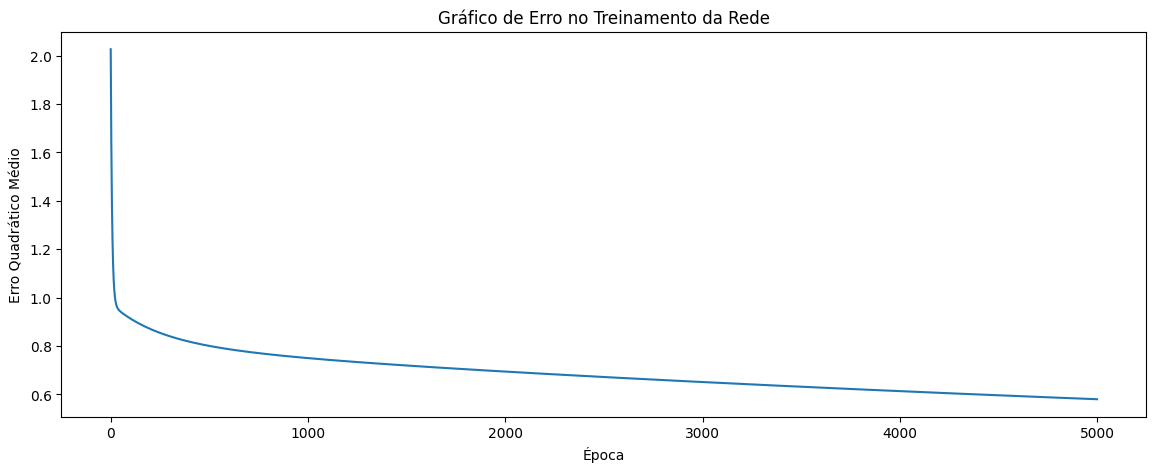

In [63]:
# Plotando o gráfico da descida do gradiente no processo de treinamento
plt.figure(figsize=(14,5))
ax = plt.subplot()
ax.plot(range(len(rede.mse_)), rede.mse_)
ax.set_ylabel('Erro Quadrático Médio')
ax.set_xlabel('Época')
ax.set_title('Gráfico de Erro no Treinamento da Rede')
plt.show()

In [64]:
# Testando a rede em lote de amostras
print("\nClassificações dos testes com amostras não apresentadas no treinamento:")

# For entrada, saida in zip(X_test, y_test):
nTests = len(y_test)
for i in range(nTests):
    rede.predict(X_test[i,:], y_test[i])

print("Acurácia: ", (nTests-rede.errorsTests)/nTests*100, "%")
print("Quantidade de erros no teste em lote: ", rede.errorsTests)
print("Número de épocas do treinamento da RNA: ", rede.epochs)
print("Erro quadrático médio final (MSE - Eqm(w)): ", rede.mse)
print("Erro quadrático final (QE - E(w) - Custo): ", rede.cost)
print("Vetor de pesos finais da RNA treinada - Limiar = ", rede.weight_[0], "Pesos das entradas = ", rede.weight_[1:])


Classificações dos testes com amostras não apresentadas no treinamento:
Acurácia:  66.66666666666666 %
Quantidade de erros no teste em lote:  5
Número de épocas do treinamento da RNA:  5000
Erro quadrático médio final (MSE - Eqm(w)):  0.580293541472354
Erro quadrático final (QE - E(w) - Custo):  10.155136975766196
Vetor de pesos finais da RNA treinada - Limiar =  0.3097888486601299 Pesos das entradas =  [ 2.44548896  1.75942841 -0.66207277 -3.6117866 ]


In [ ]:
0.309

In [46]:
import numpy as np

# Criando amostras individuais
A = np.array([0.698, 0.002, 0.604, 0.586])  # Exemplo de amostra com padrão desejado de -1
A_y = np.array(-1)
B = np.array([0.687, 0.528, 0.405 , 0.823])  # Exemplo de amostra com padrão desejado de 1
B_y = np.array(1)

print("Apresentação dos testes individuais:")
print ("Amostra A - Padrão desejado = -1 -> ", rede.predict(A, A_y))
print ("Amostra B - Padrão desejado = 1 -> ", rede.predict(B, B_y))


Apresentação dos testes individuais:
Amostra A - Padrão desejado = -1 ->  Acerto
Amostra B - Padrão desejado = 1 ->  Acerto


In [70]:
import pandas as pd

data = {
    'Amostra': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'x1': [0.9694, 0.5427, 0.6081, -0.1618, 0.1870, 0.4891, 0.3777, 1.1498, 0.9325, 0.5060, 0.0497, 0.4004, -0.1874, 0.5060, 1.6375],
    'x2': [0.6909, 1.3832, -0.9196, 0.4694, -0.2578, -0.5276, 2.0149, -0.4067, 1.0950, 1.3317, -2.0656, 3.5369, 1.3343, 1.3317, -0.7911],
    'x3': [0.4334, 0.6390, 0.5925, 0.2030, 0.6124, 0.4378, 0.7423, 0.2469, 1.0359, 0.9222, 0.6124, 0.9766, 0.5374, 0.9222, 0.7537],
    'x4': [3.4965, 4.0352, 0.1016, 3.0117, 1.7749, 0.6439, 3.3932, 1.5866, 3.3591, 3.7174, -0.6585, 5.3532, 3.2189, 3.7174, 0.5515],
    'd': [-1, -1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 1],
    'y': ['T1', 'T1', 'T2', 'T1', 'T1', 'T2', 'T2', 'T2', 'T2', 'T1', 'T1', 'T2', 'T1', 'T1', 'T2']
}

base_test = pd.DataFrame(data)

print(base_test)


    Amostra      x1      x2      x3      x4  d   y
0         1  0.9694  0.6909  0.4334  3.4965 -1  T1
1         2  0.5427  1.3832  0.6390  4.0352 -1  T1
2         3  0.6081 -0.9196  0.5925  0.1016  1  T2
3         4 -0.1618  0.4694  0.2030  3.0117 -1  T1
4         5  0.1870 -0.2578  0.6124  1.7749 -1  T1
5         6  0.4891 -0.5276  0.4378  0.6439  1  T2
6         7  0.3777  2.0149  0.7423  3.3932  1  T2
7         8  1.1498 -0.4067  0.2469  1.5866  1  T2
8         9  0.9325  1.0950  1.0359  3.3591  1  T2
9        10  0.5060  1.3317  0.9222  3.7174  1  T1
10       11  0.0497 -2.0656  0.6124 -0.6585 -1  T1
11       12  0.4004  3.5369  0.9766  5.3532  1  T2
12       13 -0.1874  1.3343  0.5374  3.2189 -1  T1
13       14  0.5060  1.3317  0.9222  3.7174 -1  T1
14       15  1.6375 -0.7911  0.7537  0.5515  1  T2


In [75]:
def Inference(row):
    base = np.array([row['x1'], row['x2'], row['x3'], row['x4']])
    return rede.predict(base, row['d'])

In [78]:
base_test['T1'] = base_test[['x1', 'x2', 'x3', 'x4', 'd']].apply(Inference, axis=1)


In [79]:
base_test

,Amostra,x1,x2,x3,x4,d,y,T1
0,1,0.9694,0.6909,0.4334,3.4965,-1,T1,Acerto
1,2,0.5427,1.3832,0.6390,4.0352,-1,T1,Acerto
2,3,0.6081,-0.9196,0.5925,0.1016,1,T2,Erro
3,4,-0.1618,0.4694,0.2030,3.0117,-1,T1,Acerto
4,5,0.1870,-0.2578,0.6124,1.7749,-1,T1,Acerto
5,6,0.4891,-0.5276,0.4378,0.6439,1,T2,Erro
6,7,0.3777,2.0149,0.7423,3.3932,1,T2,Erro
7,8,1.1498,-0.4067,0.2469,1.5866,1,T2,Erro
8,9,0.9325,1.0950,1.0359,3.3591,1,T2,Erro
9,10,0.5060,1.3317,0.9222,3.7174,1,T1,Erro
